<a href="https://colab.research.google.com/github/mjbooo/Pr4AI/blob/main/02_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Today's Practice Topics
1. ### Data Plotting
2. ### Generating Samples
3. ### Regression (Overfitting, underfitting)
4. ### Data Loading
5. ### Classification

In [ ]:
# Question
  # the difference b.w (5, ) & (5, 1)?

In [ ]:
import numpy as np
from matplotlib import pyplot as plt  # Anything can be found in matplotlib.org. Just google it
import sklearn

### Matplotlib Example

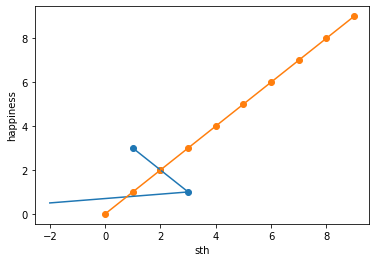

In [ ]:
plt.plot([1,2,3, -2], [3,2,1,0.5])    # plot=line
plt.scatter([1,2,3], [3,2,1]) # scatter=dot
plt.plot(np.arange(10), np.arange(10))
plt.scatter(np.arange(10), np.arange(10))  # can carry multiple mplot
plt.xlabel('sth')
plt.ylabel('happiness')

plt.show()  # colab notebook: automatically plots the graph w/o show, the other ide don't.

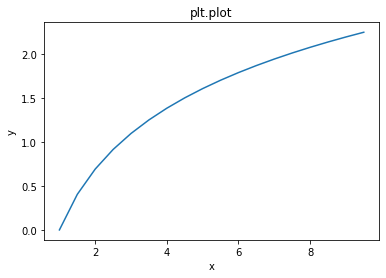

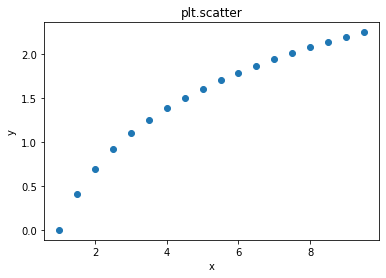

In [ ]:
# Practice

def ftn_log(x):
  return np.log(x)

x = np.arange(1,10,0.5)
y= ftn_log(x)

plt.plot(x,y) # plt.plot(x_list, y_list)
plt.title('plt.plot')
plt.xlabel('x');  plt.ylabel('y')
plt.show()

plt.scatter(x,y)
plt.title('plt.scatter')
plt.xlabel('x');  plt.ylabel('y')
plt.show()

In [ ]:
def draw_plot(X, Y, x_sample, y_sample):  
    for i in range(len(X)): # X, Y: go through the list (not nd.array)
        plt.plot(X[i], Y[i])
    plt.scatter(x_sample, y_sample)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='yellow')  # axhline = axis, horizontal line
    plt.axvline(0, color='purple')  # axvline = axis, vertical line
    plt.show()

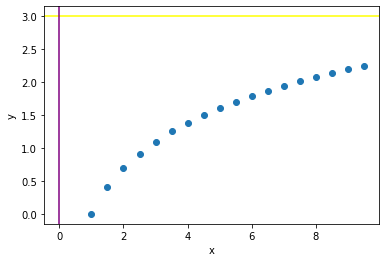

In [ ]:
draw_plot(x, y, x, y)

### Drawing a function

<class 'numpy.ndarray'>
<class 'list'>


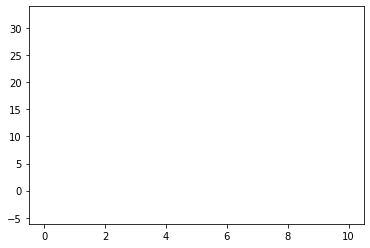

In [ ]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)
x_line = np.linspace(0, 10, 100) # np,linspace: evenly distributed sample (start, end, # of elem in the list)
y_line = foo(x_line)

#print(x_line)
print(type(x_line))
print(type([x_line]))


100


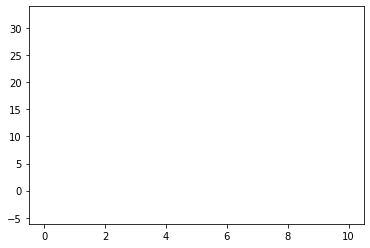

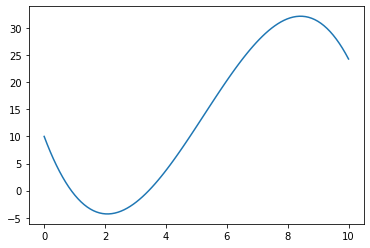

In [ ]:
# plt.plot: list vs. nd.array (plt.scatter() is ok for both dtype)
print(len(x_line))
for i in range(len(x_line)): # X, Y: go through the list (not nd.array)
  plt.plot(x_line[i], y_line[i])
  #print(x_line[i], y_line[i])
plt.show()

x_list = [x_line];  y_list = [y_line]
for i in range(len(x_list)): # X, Y: go through the list (not nd.array)
  plt.plot(x_list[i], y_list[i])
plt.show()

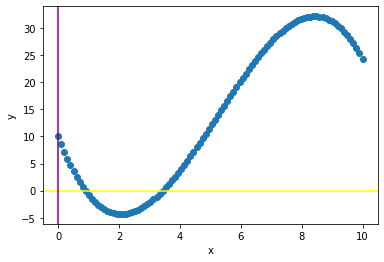

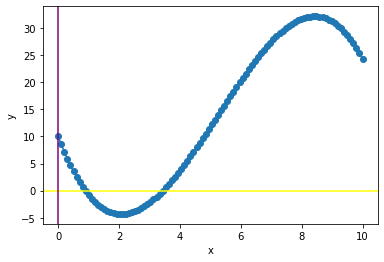

In [ ]:
# Quiz: Draw the function foo using x_line
# type(x_line) = numpy.ndarray
# type([x_line]) = list

draw_plot(x_line, foo(x_line),x_line, foo(x_line)) 
draw_plot([x_line], [foo(x_line)],x_line, foo(x_line)) 


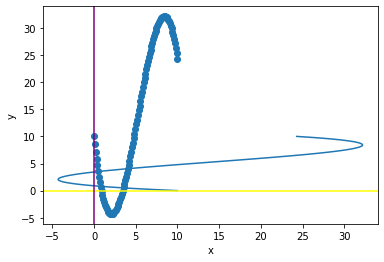

In [ ]:
# Quiz: Create symmetric graph along a line x=y
draw_plot([foo(x_line)], [x_line],x_line, foo(x_line))

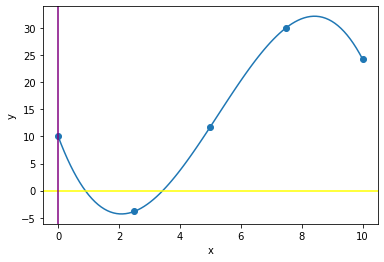

In [ ]:
# Quiz: Sample 5 points of foo in the domain [0, 10] and visualize with draw_plot
x_sample = np.linspace(0, 10, 5)
y_sample = foo(x_sample)
draw_plot([x_line], [foo(x_line)], x_sample, y_sample)

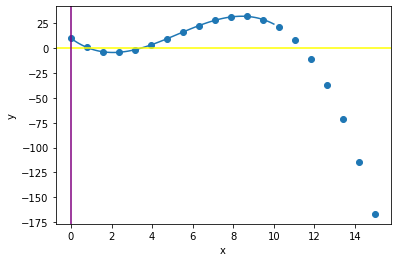

In [ ]:
# Quiz: Sample 20 points of foo in the domain [0, 15] and visualize with draw_plot

x_sample = np.linspace(0, 15, 20)
y_sample = foo(x_sample)

draw_plot([x_line], [foo(x_line)], x_sample, foo(x_sample))

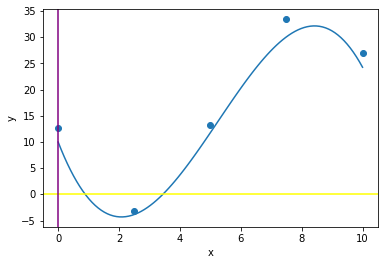

In [ ]:
# Quiz: Sample 5 points of foo in the domain [0, 10] with Gaussian noise where mu=0, sigma=0.1 and visualize.
x_sample = np.linspace(0, 10, 5)
np.random.seed(seed=0)
y_sample = foo(x_sample)+ np.random.normal(0, 1.5, 5) # list+ list (made by random, not just single integer which would be broadcasted)
draw_plot([x_line], [foo(x_line)], x_sample, y_sample)

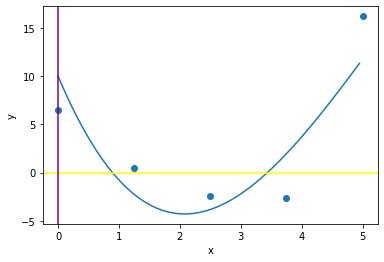

In [ ]:
# Quiz: Sample 5 points of foo in the domain [0, 5] with Gaussian noise where mu=0, sigma=3 and visualize.

x_sample = np.linspace(0, 5, 5)
y_sample = foo(x_sample) + np.random.normal(0, 3, 5)

draw_plot([x_line[x_line<5]], [foo(x_line[x_line<5])], x_sample, y_sample)
#draw_plot(x_line, foo(x_line), x_sample, y_sample)



### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression # All sklearn: same pattern to tr & te

# Defining a linear regression model.
lr = LinearRegression() # instantiating the LR class

In [ ]:
# Training the linear regression model.
print(type(x_sample))
print('x_sample:', x_sample.shape, x_sample) # w/o None, x_sample causes error (cause it's a single dimensioanl feature). 
print('x_sample[:, None]: ', x_sample[:, None].shape, x_sample[:, None])  # The input should be multi dimensional by adding new axis

# y_sample: already a vector
print('y_sample:', y_sample.shape)
print('y_sample[:,None]:', y_sample[:,None].shape)

lr.fit(x_sample[:, None], y_sample) # fit= training
lr.fit(x_sample[:, None], y_sample[:,None]) # fit= training
lr.fit(x_sample, y_sample) # x_sample -> ValueError: Expected 2D array, got 1D array instead:

<class 'numpy.ndarray'>
x_sample: (5,) [0.   1.25 2.5  3.75 5.  ]
x_sample[:, None]:  (5, 1) [[0.  ]
 [1.25]
 [2.5 ]
 [3.75]
 [5.  ]]
y_sample: (5,)
y_sample[:,None]: (5, 1)


ValueError: ignored

In [ ]:
# Coefficient of Determination (i.e. R^2, R Squared)
r2 = lr.score(x_sample[:, None], y_sample)
print("R^2:%f" % r2)

r2 = lr.score(x_sample, y_sample) 
# ValueError: Expected 2D array, got 1D array instead. 
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

R^2:0.106150


ValueError: ignored

In [ ]:
# Predicting a single data point.
y_hat = lr.predict(x_sample[:, None])
print(y_hat)

[[0.33445393]
 [1.9766241 ]
 [3.61879427]
 [5.26096444]
 [6.90313461]]


In [ ]:
# Quiz: Calculate Mean Squared Error using x_sample and y_sample and lr.predict()
MSE=((y_sample[:,None] - y_hat)**2).mean()
# MSE=((y_sample] - y_hat)**2).mean()
# Warning!; the difference b.w (n, ) and (n, 1)

print('(y_sample[:,None] - y_hat).shape:', (y_sample[:,None] - y_hat).shape)
print('(y_sample - y_hat).shape:', (y_sample - y_hat).shape)

print(y_sample[:,None] - y_hat)

print(MSE)



(y_sample[:,None] - y_hat).shape: (5, 1)
(y_sample - y_hat).shape: (5, 5)
[[ 6.17009654]
 [-1.55093035]
 [-6.06109267]
 [-7.90540978]
 [ 9.34733626]]
45.41610392565251


In [ ]:
# Quiz: Use x_line, lr.predict() and draw_plot to visualize the linear regression model,
#       in comparison with the original function foo.

x_line = np.linspace(0, 10, 100)
y_lr= lr.predict(x_line[:,None])
draw_plot([x_line, x_line], [y_line, y_lr],x_sample, y_sample)
# LR: underfitting case

### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Defining a polynomial feature transformer.
poly = PolynomialFeatures(degree=5)

# Transform the original features to polynomial features.
x_sample_poly = poly.fit_transform(x_sample[:, None])
print('x_sample:\n', x_sample)
print('\nx_sample_poly:\n', x_sample_poly)

x_sample:
 [0.   1.25 2.5  3.75 5.  ]

x_sample_poly:
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.25000000e+00 1.56250000e+00 1.95312500e+00
  2.44140625e+00 3.05175781e+00]
 [1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01]
 [1.00000000e+00 3.75000000e+00 1.40625000e+01 5.27343750e+01
  1.97753906e+02 7.41577148e+02]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01 1.25000000e+02
  6.25000000e+02 3.12500000e+03]]


In [ ]:
# Train a linear regression model using the polynomial features.
pr = LinearRegression().fit(x_sample_poly, y_sample)
rr = Ridge(alpha=1).fit(x_sample_poly, y_sample)

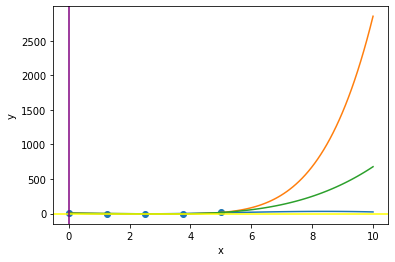

In [ ]:
# Quiz: Visualize the polynomial regression model, in comparison with foo.
x_line_poly= poly.fit_transform(x_line[:,None])
y_poly=pr.predict(x_line_poly)
y_rr=rr.predict(x_line_poly)
#print(y_poly)

draw_plot([x_line, x_line, x_line], [foo(x_line), y_poly, y_rr], x_sample, y_sample)

# Quiz: What happens if you increase/decrease the degree of the polynomial?

### Iris Dataset

In [ ]:
data_path = './iris.data'
X = []
y = []

from sklearn.datasets import load_iris
X, y= load_iris(return_X_y=True)

iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
'''
with open(data_path, 'r') as fid:
    count = 0
    for line in fid:
        print(line.strip())
'''
X = np.array(X)
y = np.array(y)

print(X)
print(y)
# Quiz: Fill the above for loop to load the data into X and y.


[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
# Tr=80%, Te=20%, train_test_split: always gives same split, then randomly choose by using random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 


### Classifiers

In [ ]:
# All ML model in sklearn consists of 3 phases - import, instantiate, fit

from sklearn.linear_model import LogisticRegression as LogR
log = LogR(random_state=145)
log.fit(X_train, y_train) 

# Quiz: Import Support Vector Machine, then train SVM
from sklearn.svm import SVC
svm=SVC(kernel='rbf', degree=0, random_state=145)
svm.fit(X_train, y_train)
# kernal: increase the power (capacity) of SVM - choose linear, poly, rbf (infinite dimensional SVM)...

# Quiz: Import Decision Tree, then train DT
from sklearn.tree import DecisionTreeClassifier as DTC
dtc=DTC(max_depth=4, random_state=145)
dtc.fit(X_train, y_train)


# depth: increase the power (capacity) of DT: classify the data into 2**n categories

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=145, splitter='best')

In [ ]:
# Quiz: Use the model's predict() to calculate the test accuracy. (use whole tr set, not first two feature)

# bool -> float (astype('float')) -> mean
a = np.array([True]); a = a.astype('float')
print(a)

# NEVER use the test set to tune the hyperparam. Use validation set

y_log=log.predict(X_test)
y_svm=svm.predict(X_test)
y_dtc=dtc.predict(X_test)

print(y_test==y_log)
print(type(y_test==y_log))
print((y_test==y_log).astype('float'))

print('y_log',(y_test==y_log).astype('float').mean())
print('y_svm',(y_test==y_svm).astype('float').mean())
print('y_dtc',(y_test==y_dtc).astype('float').mean())


# Another way of using score())
print(log.score(X_test, y_test))
print(svm.score(X_test, y_test))
print(dtc.score(X_test, y_test))

[1.]
[False  True  True  True  True  True  True False False  True False False
  True False  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True]
<class 'numpy.ndarray'>
[0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1.]
y_log 0.7333333333333333
y_svm 0.7333333333333333
y_dtc 0.6
0.7333333333333333
0.7333333333333333
0.6


In [ ]:
# Quiz: Use various model options, features, and the score() fuction to compare performance.

# 1: degree
from sklearn.svm import SVC
svm_rbf1 = SVC(kernel= 'rbf', degree= 1, random_state= 145)
svm_rbf3 = SVC(kernel= 'rbf', degree= 3, random_state= 145)
svm_rbf5 = SVC(kernel= 'rbf', degree= 5, random_state= 145)

svm_rbf1.fit(X_train, y_train)
svm_rbf3.fit(X_train, y_train)
svm_rbf5.fit(X_train, y_train)

print('by degree')
print('deg 1:', svm_rbf1.score(X_test, y_test))
print('deg 3:',svm_rbf3.score(X_test, y_test))
print('deg 5:',svm_rbf5.score(X_test, y_test))

# 2: kernel
svm_rbf = SVC(kernel= 'rbf', random_state= 145)
svm_lin = SVC(kernel= 'linear', random_state= 145)
svm_poly = SVC(kernel= 'poly', random_state= 145)
svm_sig = SVC(kernel= 'sigmoid', random_state= 145)

svm_rbf.fit(X_train, y_train)
svm_lin.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_sig.fit(X_train, y_train)

print('\nby kernel')
print('rbf', svm_rbf.score(X_test, y_test))
print('linear', svm_lin.score(X_test, y_test))
print('poly', svm_poly.score(X_test, y_test))
print('sigmoid', svm_sig.score(X_test, y_test))


by degree
deg 1: 0.7333333333333333
deg 3: 0.7333333333333333
deg 5: 0.7333333333333333

by kernel
rbf 0.7333333333333333
linear 0.7333333333333333
poly 0.7333333333333333
sigmoid 0.2


(120, 2)


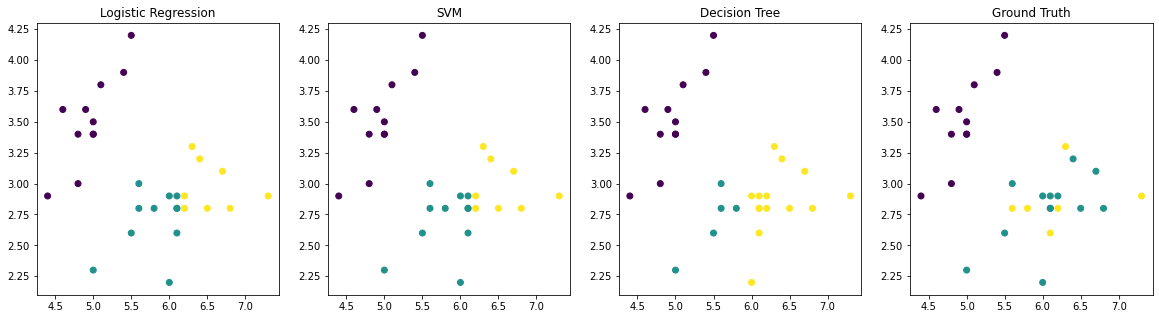

In [ ]:
# Quiz: Can you draw four scatterplots for each model's predictions and the true labels? (Example shown below)

# tensorboard: useful to show training process
# same data pts & different classification: c = y_predict (distinguished by various colors)
# matplotlib.mashgrid can show decision boundary. 

print(X_train.shape)  # 120 data, 4 features
log.fit(X_train[:,:2], y_train) # Cause it should be drawn on 2-D graph
svm.fit(X_train[:,:2], y_train)
dtc.fit(X_train[:,:2], y_train)

y_log=log.predict(X_test[:,:2])
y_svm=svm.predict(X_test[:,:2])
y_dtc=dtc.predict(X_test[:,:2])

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Logistic Regression')
plt.scatter(X_test[:,0],X_test[:,1],c=y_log)

plt.subplot(142)
plt.title('SVM')
plt.scatter(X_test[:,0],X_test[:,1],c=y_svm)

plt.subplot(143)
plt.title('Decision Tree')
plt.scatter(X_test[:,0],X_test[:,1],c=y_dtc)

plt.subplot(144)
plt.title('Ground Truth')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

plt.show()

![Scatterplot](https://i.imgur.com/TDvaIWA.png)